In [1]:
# understand logistic regression

In [2]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
eta=1e-03   # learning rate
epoch=5000   # repeat num

x=[153, 220, 118, 474, 485, 233, 396, 484, 429, 286, 399, 403, 252, 497, 379, 76, 263, 26, 61, 420]
y=[432, 262, 214, 384, 411, 430, 361, 349, 259, 220, 433, 340, 34, 472, 416, 163, 112, 193, 473, 253]

clas=[0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1]

In [4]:
def standarize(df):
    m=df.mean(axis=0)
    s=df.std(axis=0)
    return (df - m) / s

def to_matrix(df):
    df_add=np.ones([df.shape[0], 1])
    return np.hstack([df_add, df])

def logistic(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

def learning(theta):
    return theta - (eta * np.dot(logistic(train_vec) - clas, train_vec))

In [5]:
df=np.array([x,y]).T
stand_df=standarize(df)  # standarize
train_vec=to_matrix(stand_df)

# just for plot
plt_df=pd.DataFrame(np.hstack([stand_df, np.array([clas]).T]))

In [6]:
# train
theta=np.random.rand(3)  # parameter
theta_d={}
for n in range(epoch):
    theta=learning(theta)
    # just for plot
    if (n % 100) == 0:
        theta_d[n]=theta

In [7]:
intercept= -(theta[0] / theta[2])
slope= -(theta[1] / theta[2])

In [8]:
# just for plot
def abline(intercept, slope):
    x_vals=np.array(ax.get_xlim())
    y_vals= intercept + (slope * x_vals)
    ax.plot(x_vals, y_vals, color='gray')

(-3.2799297249624493, 2.30691931755362)

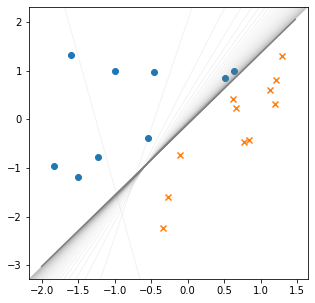

In [9]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)

for n,m in zip([0,1], ['o', 'x']):
    tmp=plt_df[plt_df[2] == n]
    ax.scatter(x=tmp[0], y=tmp[1], marker=m)
abline(intercept, slope)

xlim=ax.get_xlim()
ylim=ax.get_ylim()

x_vals=np.array(xlim)
for n in theta_d:
    intercept= -(theta_d[n][0] / theta_d[n][2])
    slope= -(theta_d[n][1] / theta_d[n][2])
    y_vals= intercept + (slope * x_vals)
    ax.plot(x_vals, y_vals, color='gray', alpha=0.1, linewidth=1)

ax.set_xlim(xlim)
ax.set_ylim(ylim)